Data Awal:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Data Setelah Preprocessing:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

Entropy Awal (Parent Node): 0.9275
Information Gain untuk fitur 'Gender': 0.0006 (Threshold: 0)
Information Gain untuk fitur 'Age': 0.2512 (Threshold: 42)
Information Gain untuk fitur 'EstimatedSalary': 0.2153 (Threshold: 90000)


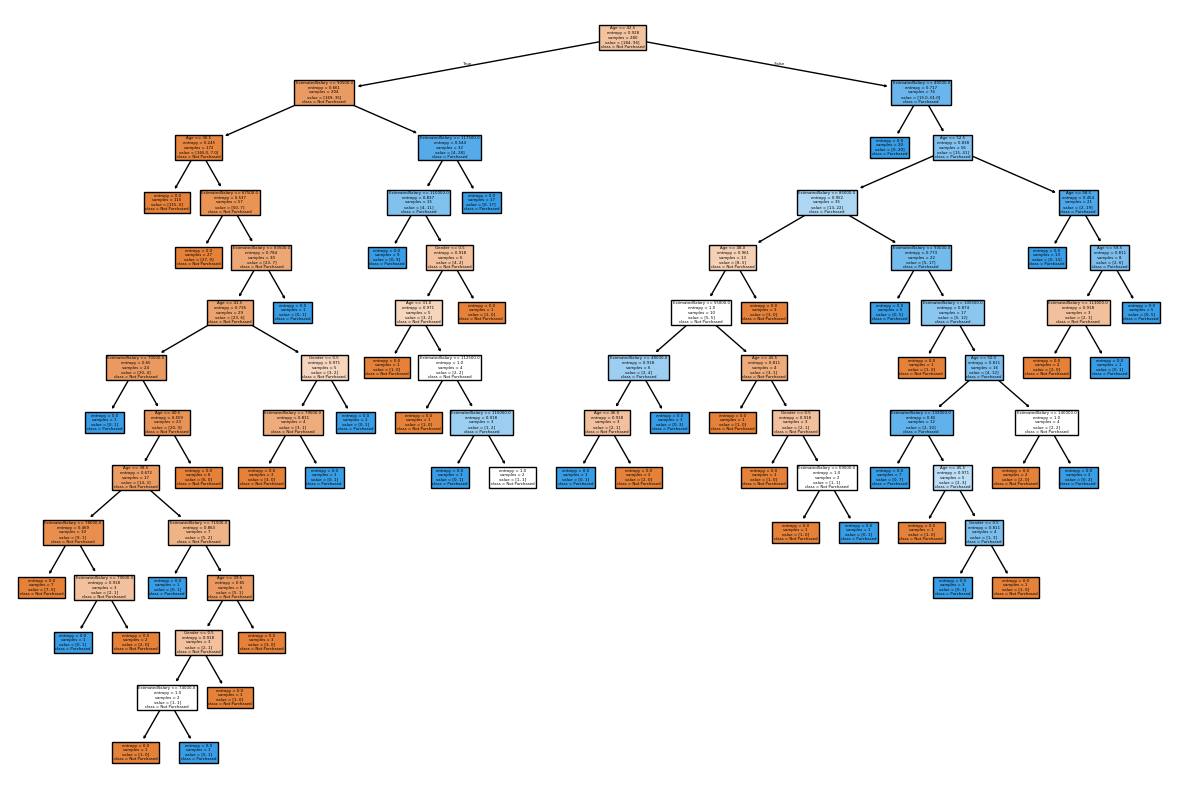


Aturan Pohon Keputusan:
|--- Age <= 42.50
|   |--- EstimatedSalary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- EstimatedSalary <= 67500.00
|   |   |   |   |--- class: 0
|   |   |   |--- EstimatedSalary >  67500.00
|   |   |   |   |--- EstimatedSalary <= 83500.00
|   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |--- EstimatedSalary <= 70500.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- EstimatedSalary >  70500.00
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- Age <= 38.50
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 78000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  78000.00
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 79500.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/Review Customer.csv'
data = pd.read_csv(file_path)

print("Data Awal:")
print(data.head())

data = data.drop(columns=['User ID'])

data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

print("\nData Setelah Preprocessing:")
print(data.head())

X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

def entropy(y):
    classes = np.unique(y)
    ent = 0
    for cls in classes:
        p = np.sum(y == cls) / len(y)
        ent -= p * np.log2(p)
    return ent

def information_gain(parent_y, splits):
    parent_entropy = entropy(parent_y)
    total_samples = len(parent_y)
    weighted_entropy = sum((len(split) / total_samples) * entropy(split) for split in splits)
    return parent_entropy - weighted_entropy

initial_entropy = entropy(y_train)
print(f"\nEntropy Awal (Parent Node): {initial_entropy:.4f}")

for col in X.columns:
    thresholds = X_train[col].unique()
    gains = []
    for t in thresholds:
        left_split = y_train[X_train[col] <= t]
        right_split = y_train[X_train[col] > t]
        splits = [left_split, right_split]
        gain = information_gain(y_train, splits)
        gains.append((t, gain))
    best_threshold, best_gain = max(gains, key=lambda x: x[1])
    print(f"Information Gain untuk fitur '{col}': {best_gain:.4f} (Threshold: {best_threshold})")

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()

print("\nAturan Pohon Keputusan:")
rules = export_text(model, feature_names=list(X.columns))
print(rules)